**Lab7 - Decision Trees**

In [1]:
## import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
## Loading the dataset

df = pd.read_csv("./sample_data/golf_df.csv")

print(df.head())

    Outlook Temperature Humidity  Windy Play
0     sunny         hot     high  False   no
1     sunny         hot     high   True   no
2  overcast         hot     high  False  yes
3     rainy        mild     high  False  yes
4     rainy        cool   normal  False  yes


In [14]:
## Conversion of the Categorical to Numerical

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [15]:
## Understanding data

df.info(),"\n--------------------------------------\n"
print("=======Statistics===========\n",df.describe(),"\n--------------------------------------")
print("=======Duplicates===========\n",df.isnull().sum(),"\n---------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Windy             14 non-null     bool 
 1   Outlook_rainy     14 non-null     bool 
 2   Outlook_sunny     14 non-null     bool 
 3   Temperature_hot   14 non-null     bool 
 4   Temperature_mild  14 non-null     bool 
 5   Humidity_normal   14 non-null     bool 
 6   Play_yes          14 non-null     bool 
dtypes: bool(7)
memory usage: 230.0 bytes
=======Statistics===========
         Windy Outlook_rainy Outlook_sunny Temperature_hot Temperature_mild  \
count      14            14            14              14               14   
unique      2             2             2               2                2   
top     False         False         False           False            False   
freq        8             9             9              10                8   

       Humidity_normal Play_ye

In [21]:
## Defining Features(X) and Target(y)

X = df.drop("Play_yes",axis=1)
y = df["Play_yes"]

## Splitting Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (11, 6)
X_test shape:  (3, 6)


In [29]:
## Training the Model

model = DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [31]:
## Testing the Model

y_pred = model.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred))


Accuracy Score : 0.6666666666666666


[Text(0.5, 0.875, 'Humidity_normal <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3, 0.625, 'Outlook_sunny <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'Windy <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.625, 'Outlook_rainy <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.375, 'Windy <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

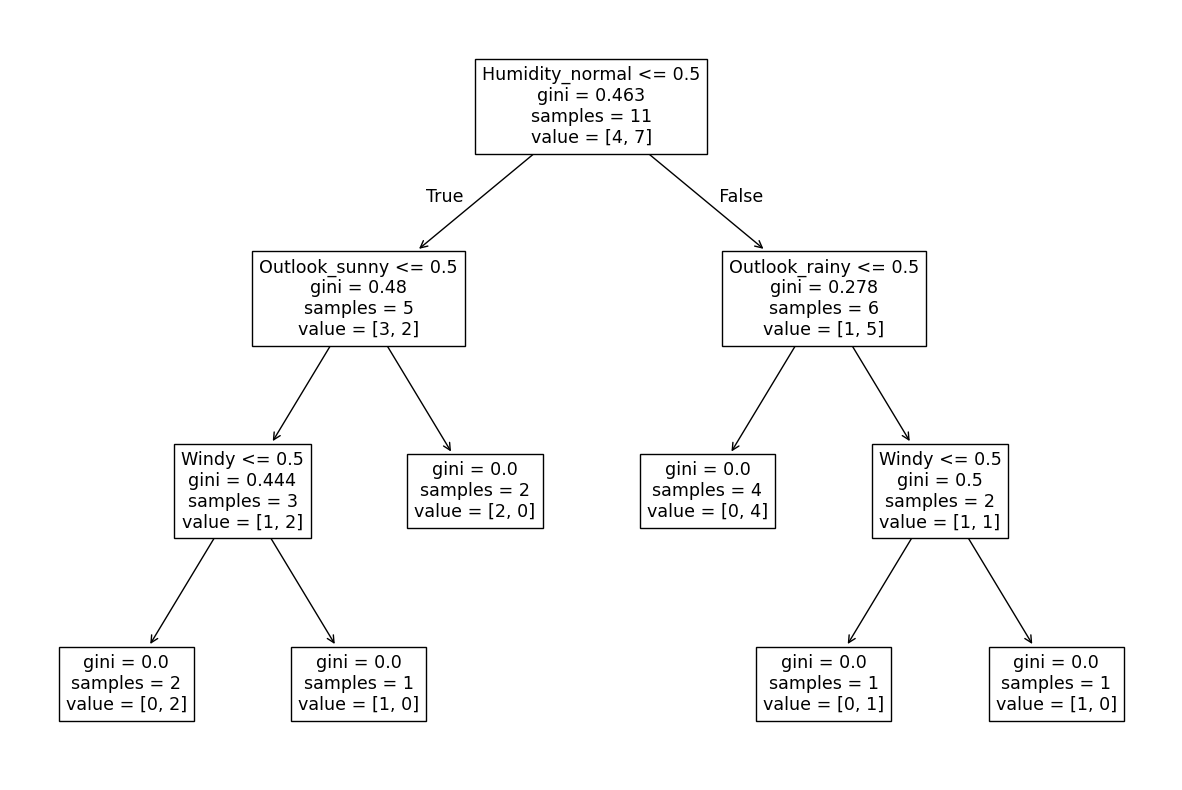

In [32]:
## Display the Decision Treee

plt.figure(figsize=(15,10))
plot_tree(model,feature_names=X.columns)

In [33]:
## Classoification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

